<a href="https://colab.research.google.com/github/boram-coco/coco1/blob/master/2022_09_14_(2%EC%A3%BC%EC%B0%A8)_9%EC%9B%9414%EC%9D%BC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (2주차) 9월14일 
>  Overview - 이미지분석(복습), 추천시스템, 텍스트분석, GAN 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## imports

In [ ]:
#
from fastai.vision.all import *  ## 이미지분석
from fastai.collab import * ## 추천시스템
from fastai.text.all import * ## 텍스트분석 
from fastai.vision.gan import * ## GAN (이미지생성)

In [ ]:
import pandas as pd

## 이미지 자료분석 실습 (지난시간 복습)

### 1단계: 데이터의 정리

In [ ]:
path=untar_data(URLs.PETS)/'images'

In [ ]:
path

#path뒤에 점찍으면 뒤에 함수 나옴. 
#path.ls 하면 뒤에 목록이 나온다!!

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
#path에서 이미지 파일만 가져오기
fnames = get_image_files(path)

In [ ]:
fnames
#이미지 파일이라는 것만 가져옴

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_52.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_73.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_37.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_186.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_188.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_156.jpg')...]

In [ ]:
path.ls()
#위에랑 다른것=이미지파일이 아닌게 3개가 있겠지!

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_52.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_73.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_37.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_186.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_188.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_156.jpg')...]

In [ ]:


 # f(x)=x+1이라는 함수가 있는데
 # lambda=x+1이라는 식으로 표현하고 싶어. 그럼 f:lamda x: x+1 하면 이 자체가 함수가 되는거임!

 f=lambda fname: 'cat' if fname[0].isupper() else 'dog'

In [ ]:

dls = ImageDataLoaders.from_name_func(
    path, 
    fnames,
    f, # f대신 (lambda fname: 'cat' if fname[0].isupper() else 'dog') 를 넣어도 가능
    item_tfms=Resize(224))

#함수잘 모르면 ? 물음표해서 성질 보기!!

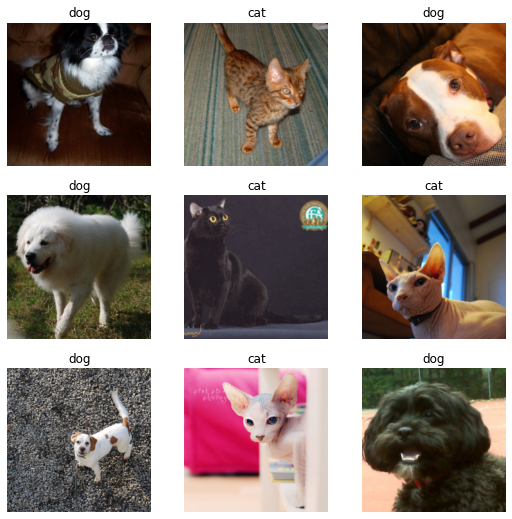

In [ ]:
dls.show_batch()

In [ ]:
#object를 하나 만드는데, 학습을 하고 학습된 결과를 토대로 예측데이터를만드는거!

### 2단계: lrnr 오브젝트 생성

In [ ]:
# 러너 오브젝트 만들기 위해서
# cnn_learner?
cnn_learner?

#코드가 있는 곳에 들어가서 찾아보면.. file로 찾아가 봅시다!!
#return이 비전러너,, 

#Signature: cnn_learner(*args, **kwargs)
#Docstring: Deprecated name for `vision_learner` -- do not use
#File:      /usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py
#Type:      function

In [ ]:
cnn_learner??

In [ ]:
?cnn_learner

In [ ]:
lrnr = cnn_learner(dls,resnet34,metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

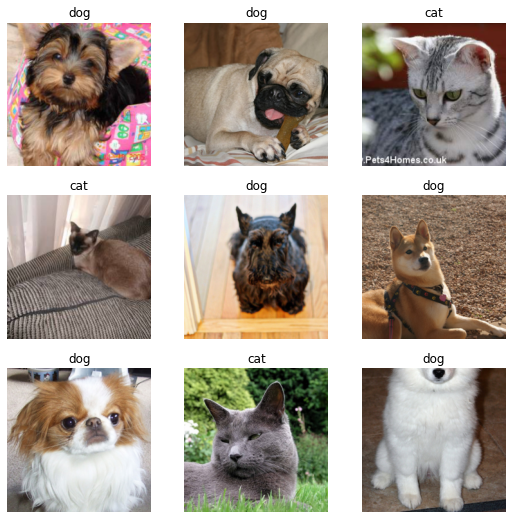

In [ ]:
lrnr.dls.show_batch()

In [ ]:
id(dls)

139724031921680

In [ ]:
id(lrnr.dls)

# 위와 아래의 주소값이 같다! 등호(=)는 포스트잇?같은걸 붙여서 너는 부르면,, 나와야햄 
# 숫자가 의미하는 것은 dls는 이름일 뿐이고 실제 오브젝트 메모리가 있는 장소
# dls 에도 포스트잇 붙여놓고 lrnr.dls에도 포스트잇 붙여논당..

139724031921680

### 3단계: lrnr.학습()

In [ ]:
lrnr.fine_tune(1)

#이거 너무 오래걸려.. 그래서 그때 GPU인가 뭐로 바꾸라고 했는데 바꿔도 너어어어어어무 느림..ㅠㅠ  그래서 뒤에 내용 다 놓쳤어 엉엉

# 오! 다시 됬땅.

epoch,train_loss,valid_loss,error_rate,time
0,0.094556,0.028600,0.007442,32:59


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
# 학습을 하는 방법은 fine_tune만 있는 것이 아니다. 
# fit, method... 등등 
# mbti확인할때 장례식장이라는 특수한 상황에서 튜닝을 해야함->fine_tune   
# 이미학습된 내 정보를 일부는 유지하고 미세한 영향을 주는 것만 조정하는 것. 기존 모델은 활용하고 새로운 모델을 조금 반영-> trnasfer model
# CNN에서 투디아키펙처? 원..?아키펙처,,,가있고 원 어쩌고 아키펙처에서 튜닝...@@@@@ 

- fine_tune()은 모든 가중치를 학습하는 것이 아니라 일부만 학습하는 것임. 
- fine_tune()이외이 방법으로 학습할 수도 있음.

### 4단계: lrnr.예측()

(방법1) lrnr.predict() 함수를 이용

In [ ]:
#lrnr.predict('2022-09-06-hani03.jpg')

In [ ]:
# X,y=dis.one_batch()
# X.shape
# torch
## 이쪽 잘 못들었어!! 다시들어야함!1
# 왼쪼

In [ ]:
#type(_rtn)
#튜플,, 대괄호면 튜플

(방법2) lrnr.model(X) 를 이용: X의 shape이 (?,3,224,224)의 형태의 텐서이어야함

## 프로그래밍 과정 

### 프로그래밍 과정 overview

`-` overview 

(1) `dls` 오브젝트 생성

(2) `lrnr` 오브젝트 생성 

(3) `lrnr.학습()` 

(4) `lrnr.예측()`

### 이미지분석, 추천시스템, 텍스트분석, GAN 분석과정 비교 

`-` 비교

| |이미지분석(CNN) | 추천시스템 | 텍스트분석 | GAN | 
|:-:|:-:|:-:|:-:|:-:|
|1단계|ImageDataLoaders|CollabDataLoaders| TextDataLoaders | DataBlock -> dls |  
|2단계|cnn_learner()|collab_learner()| language_model_learner() | GANLearner.wgan() | 
|3단계|lrnr.fine_tune(1)|lrnr.fit()| lrnr.fit() | lrnr.fit() |
|4단계|lrnr.predict(), lrnr.model(X)|lrnr.model(X)| lrnr.predict() | | 

## 추천시스템 실습

### 1단계

In [ ]:
df_view=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_view.csv')
#웹에 있는걸 바로 가져오기
df_view
# !wget ~뒤에 링크 하면 옆에 파일로 떠서 볼수있다는듯
# 빈칸이 있는 건 메모리를 많이 잡아 먹음,


,커피1,커피2,커피3,커피4,커피5,커피6,커피7,커피8,커피9,커피10,홍차1,홍차2,홍차3,홍차4,홍차5,홍차6,홍차7,홍차8,홍차9,홍차10
0,4.149209,NaN,NaN,4.078139,4.033415,4.071871,NaN,NaN,NaN,NaN,1.142659,1.109452,NaN,0.603118,1.084308,NaN,0.906524,NaN,NaN,0.903826
1,4.031811,NaN,NaN,3.822704,NaN,NaN,NaN,4.071410,3.996206,NaN,NaN,0.839565,1.011315,NaN,1.120552,0.911340,NaN,0.860954,0.871482,NaN
2,4.082178,4.196436,NaN,3.956876,NaN,NaN,NaN,4.450931,3.972090,NaN,NaN,NaN,NaN,0.983838,NaN,0.918576,1.206796,0.913116,NaN,0.956194
3,NaN,4.000621,3.895570,NaN,3.838781,3.967183,NaN,NaN,NaN,4.105741,1.147554,NaN,1.346860,NaN,0.614099,1.297301,NaN,NaN,NaN,1.147545
4,NaN,NaN,NaN,NaN,3.888208,NaN,3.970330,3.979490,NaN,4.010982,NaN,0.920995,1.081111,0.999345,NaN,1.195183,NaN,0.818332,1.236331,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.511905,1.066144,NaN,1.315430,NaN,1.285778,NaN,0.678400,1.023020,0.886803,NaN,4.055996,NaN,NaN,4.156489,4.127622,NaN,NaN,NaN,NaN
96,NaN,1.035022,NaN,1.085834,NaN,0.812558,NaN,1.074543,NaN,0.852806,3.894772,NaN,4.071385,3.935935,NaN,NaN,3.989815,NaN,NaN,4.267142
97,NaN,1.115511,NaN,1.101395,0.878614,NaN,NaN,NaN,1.329319,NaN,4.125190,NaN,4.354638,3.811209,4.144648,NaN,NaN,4.116915,3.887823,NaN
98,NaN,0.850794,NaN,NaN,0.927884,0.669895,NaN,NaN,0.665429,1.387329,NaN,NaN,4.329404,4.111706,3.960197,NaN,NaN,NaN,3.725288,4.122072


In [ ]:
#위에 링크: 교수님 깃허브-> DL2022/_notebooks/2022-09-08-rcmd_anal.csv
#컴퓨터가 좋아하는 타입이 아님. 컴퓨터가 좋아하는 타입으로...

In [ ]:
#'-' 컴퓨터가 좋아하는 데이터 타입
# https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv

In [ ]:
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv

--2022-09-14 11:32:06--  https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31987 (31K) [text/plain]
Saving to: ‘2022-09-08-rcmd_anal.csv’

2022-09-08-rcmd_ana 100%[===================>]  31.24K  --.-KB/s    in 0.002s  

2022-09-14 11:32:06 (13.2 MB/s) - ‘2022-09-08-rcmd_anal.csv’ saved [31987/31987]



In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')

In [ ]:
dls = CollabDataLoaders.from_df(df)

In [ ]:
CollabDataLoaders.from_df?

In [ ]:
dls.show_batch()

,user,item,rating
0,47,12,0.937742
1,29,12,0.964676
2,96,4,1.315430
3,9,13,0.967607
4,8,14,1.092273
5,91,10,1.453194
6,41,11,0.973238
7,26,10,3.794259
8,23,2,4.048529
9,45,17,0.608018


In [ ]:
dls.one_batch()
#가로로시자하니까 타입이 튜플

(tensor([[84, 10],
         [55, 16],
         [62, 10],
         [91,  8],
         [98,  2],
         [60, 17],
         [92,  4],
         [58, 13],
         [58,  8],
         [99,  6],
         [30,  5],
         [96,  4],
         [15, 20],
         [59, 12],
         [ 3, 20],
         [ 9, 10],
         [77,  1],
         [67, 14],
         [71, 15],
         [ 4, 13],
         [27, 16],
         [67, 17],
         [15,  1],
         [36, 11],
         [41,  2],
         [76, 18],
         [52,  8],
         [10, 18],
         [ 9,  7],
         [22, 15],
         [42,  1],
         [33,  7],
         [74, 13],
         [67, 18],
         [36,  6],
         [83,  1],
         [33, 16],
         [24, 18],
         [97, 20],
         [51,  7],
         [84,  2],
         [76,  1],
         [74,  5],
         [44,  6],
         [98, 15],
         [75, 13],
         [62, 18],
         [53, 15],
         [26, 10],
         [25,  9],
         [55,  9],
         [52,  6],
         [57

In [ ]:
type(dls.one_batch())

tuple

In [ ]:
X,y=dls.one_batch()

In [ ]:
X[:5]

tensor([[29,  8],
        [41, 15],
        [27, 17],
        [58, 19],
        [87, 11]])

In [ ]:
y[:5]

#y는 평점 x는 사람의 인덱스,아이템인덱스
#파이썬은 인덱스가 0번으로 되어잇는지 1번으로 되어잇는지 헷갈료
#dls를 만들때 제일작은게 0인지 1인지 궁금쓰

tensor([[4.1002],
        [0.7859],
        [1.0369],
        [4.0163],
        [4.0558]])

In [ ]:
df.user

0        1
1        1
2        1
3        1
4        1
      ... 
995    100
996    100
997    100
998    100
999    100
Name: user, Length: 1000, dtype: int64

In [ ]:
df.user.unique(), df.item.unique()
#중복제거하고 유니크한 숫자만 보고싶을때
#유저는 1~100까지, 아이템은 1~20까지 있다는 걸 확인할 수 있음

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([15,  1, 11,  5,  4, 14,  6, 20, 12, 17,  8,  9, 13, 19, 18, 16,  2,
         3, 10,  7]))

### 2단계 

In [ ]:
?collab_learner

In [ ]:
lrnr = collab_learner(dls, y_range=(0.5))

### 3단계

In [ ]:
lrnr.fit(10) 
#이거왜안되지?ㅠㅠ 위에 파인튠학습안되서 그런가...흠 

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.564446,0.408502,0.408502,-0.763844,02:29
1,-0.580162,0.261919,0.261919,-0.767689,02:27
2,-0.573394,0.211019,0.211019,-0.748596,02:26
3,-0.565945,0.312586,0.312586,-0.731640,02:26
4,-0.533000,0.208635,0.208635,-0.709664,02:26
5,-0.563198,0.189235,0.189235,-0.736768,02:26
6,-0.565810,0.210935,0.210935,-0.741373,02:26
7,-0.565554,0.257288,0.257288,-0.737568,02:26
8,-0.562049,0.309152,0.309152,-0.743085,02:26
9,-0.565225,0.227808,0.227808,-0.726368,02:27


### 4단계

In [ ]:
!nvidia-smi
#GPU를 써야 학습이 빨리 된다... 
#CPU로 되어있어서?.. .?????? batch라는 개념을 알아야함..

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#lrnr.model(X.to("cuda:0"))
#y.reshpe(-1) 학습이 얼마 안된면 잘 몰라,, 그래서 위에 3단계에서 fit옆에 좀더 숫자를 키워,,
#3단계안되서 4단계 다 안되는듯..

RuntimeError: ignored

## 텍스트분석 실습

### 1단계

In [ ]:
# 텍스트 데이터는 순환신경망을 사용한다!!
# 만약 hello라는 단어를 생각할때, 
# h -> e
# e -> l
# l -> l
# l -> o
# 근데 l이 애매하다!! 그래서 두개 시점으로 하는게 좋을 거 같아

# he -> l
# el -> l
# ll -> o


#순서가 중요한게 있음. 텍스트랑 시계열~~

# 다음텍스트가 뭐가 나오는지 적용시키는것 중 하나가 챗봇!
# 나는 학교에 갔다.
# 나는 다음에 학교에 가 나와야함. 반복되는 단위가 단어... 또는 문장 단위로 반복될 수도 있음!!

# 나는 학교에 갔다. => 공부를 했다. => 집에 왓당..

# 텍스트는 문맥에 맞게 그럴듯한걸 결과값을 주면 된다. cf)주식은 그 뒤에 값을 정해야함!! ㅠ 내일의 주식장...

'h e l l o . h e l l o ! h e l l o ? h e l l o !!'

### 2단계

### 3단계 

### 4단계

## GAN intro

`-` 저자: 이안굿펠로우 (이름이 특이함. 좋은친구..) 
- 천재임 
- 지도교수가 요수아 벤지오 

`-` 논문 NIPS, 저는 이 논문 읽고 소름돋았어요.. 
- https://arxiv.org/abs/1406.2661 (현재시점, 38751회 인용되었음 $\to$ 48978회 인용..)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤, 2014년 시점..) 

`-` 무슨내용? 생성모형 

### 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자) 

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와 고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고 볼수 있는가? 

`-` 진정으로 인공지능이 이미지를 이해했다면, 이미지를 만들수도 있어야 한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공 

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg)

#### GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면?
- https://www.lgsl.kr/sto/stories/60/ALMA2020070001

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면? 

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소) 


`-` 게임영상 (파이널판타지)

`-` 거북이의 커버.. 

`-` 너무 많아요.....

### 생성모형이란? 통계학과 버전의 설명 

> 제한된 정보만으로 어떤 문제를 풀 때, 그 과정에서 원래의 문제보다 일반적인 문제를 풀지 말고, 가능한 원래의 문제를 직접 풀어야한다. 배프닉 (SVM 창시자) 

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자. 

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이 있다. 

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다. 

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률 $p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은 불가능 

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x,y)}{\sum_{y}p(x,y)} $$

- 즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능 

`-` 따라서 배프닉의 원리에 의하면 식별적 분류가 생성적 분류보다 바람직한 접근법이라 할 수 있음. 

`-` 하지만 다양한 현실문제에서 생성모형이 유용할때가 많다. 

### GAN의 원리

`-` GAN은 생성모형중 하나임 

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다. 

> The generative model can be thought of as analogous to a team of counterfeiters,
trying to produce fake currency and use it without detection, while the discriminative model is
analogous to the police, trying to detect the counterfeit currency. Competition in this game drives
both teams to improve their methods until the counterfeits are indistiguishable from the genuine
articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate) 

`-` 무식한 상황극.. 

- 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림) 
- 경찰: (위조범이 만든 돈을 보고) 이건 가짜다! 
- 위조범: 걸렸군.. 더 정교하게 만들어야지.. 
- 경찰: 이건 진짠가?... --> 상사에게 혼남. 그것도 구분못하냐고 
- 위조범: 더 정교하게 만들자.. 
- 경찰: 더 판별능력을 업그레이드 하자! 
- 반복.. 

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만 가짜라고 말할때) 학습을 멈춘다. 

## GAN 실습

### 1단계

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

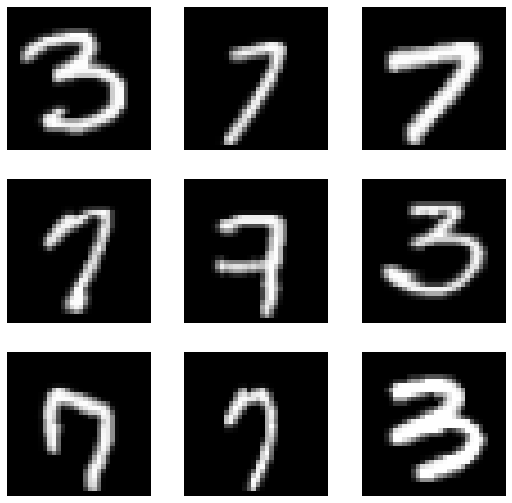

In [ ]:
dls.show_batch()

### 2단계 

In [ ]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1)
police = basic_critic(32,n_channels=3,n_extra_layers=1)

In [ ]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

### 3단계

`-` lrnr.fit(10) 진행 

In [ ]:
lrnr.fit(10)

/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,gen_loss,crit_loss,time


KeyboardInterrupt: ignored

In [ ]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총20회

In [ ]:
lrnr.fit(10)

In [ ]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총30회

In [ ]:
lrnr.fit(10)

In [ ]:
lrnr.show_results()

### 4단계 (없음)